<a href="https://colab.research.google.com/github/cincysam6/HelloWorld/blob/master/KFL_analysis_22_draft_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Data


In [1]:
library(dplyr)
library(ggplot2)
library(tidyverse)


# install packages if you haven't already
install.packages("ggbeeswarm")
install.packages("ggthemes")
install.packages("ggplot2")
install.packages("lubridate")
library(lubridate)
 
# load libraries
library("ggbeeswarm")
library("ggthemes")
library("ggplot2")

 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/s

In [27]:
NFL_schedules<-read.csv("NFL_schedules.csv")
NFL_weekly_player_stats<-read.csv("NFL_weekly_player_stats.csv")
NFL_rosters<-read.csv("nfl_rosters.csv")
str(NFL_weekly_player_stats)

'data.frame':	110721 obs. of  30 variables:
 $ X                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ player_id             : chr  "00-0000003" "00-0000003" "00-0000003" "00-0000003" ...
 $ player_name           : chr  "A.al-Jabbar" "A.al-Jabbar" "A.al-Jabbar" "A.al-Jabbar" ...
 $ recent_team           : chr  "MIA" "MIA" "MIA" "CLE" ...
 $ season                : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...
 $ week                  : int  1 2 4 7 8 9 10 11 12 13 ...
 $ position              : chr  "RB" "RB" "RB" "RB" ...
 $ season_type           : chr  "REG" "REG" "REG" "REG" ...
 $ completions           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ attempts              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ passing_yards         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ passing_tds           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ interceptions         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ rushing_yards         : int  60 33 2 27 39 23 54 11 35 29 ...
 $ rushing_tds           : int  1 0 0 0 0 0 0 0 0 0 

In [28]:
FF_calc_adp_2022<-read.csv("FF_calc_adp.csv")
FF_calc_adp_2021<-read.csv("FF_calc_adp_2021.csv")
FF_calc_adp_2020<-read.csv("FF_calc_adp_2020.csv")
FF_calc_adp_2019<-read.csv("FF_calc_adp_2019.csv")
FF_calc_adp_2018<-read.csv("FF_calc_adp_2018.csv")
FF_calc_adp_2017<-read.csv("FF_calc_adp_2017.csv")
FF_calc_adp_2016<-read.csv("FF_calc_adp_2016.csv")
FF_calc_adp_2015<-read.csv("FF_calc_adp_2015.csv")

FF_calc_adp_2022<-FF_calc_adp_2022%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2021) %>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2022)
FF_calc_adp_2021<-FF_calc_adp_2021%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2021)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2021)
FF_calc_adp_2020<-FF_calc_adp_2020%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2020)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2020)
FF_calc_adp_2019<-FF_calc_adp_2019%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2019)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2019)
FF_calc_adp_2018<-FF_calc_adp_2018%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2018)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2018)
FF_calc_adp_2017<-FF_calc_adp_2017%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2017)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2017)
FF_calc_adp_2016<-FF_calc_adp_2016%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2016)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2016)
FF_calc_adp_2015<-FF_calc_adp_2015%>%left_join(NFL_rosters,by=c("Name"="full_name"))%>%filter(season==2015)%>% arrange(Position,Overall) %>%group_by(Position) %>% mutate(rank = rank(Overall),season=2015)

FF_calc_adp_2015$Bye<-as.integer(FF_calc_adp_2015$Bye)
total_FF_calc_adp<-bind_rows(FF_calc_adp_2015,FF_calc_adp_2016,FF_calc_adp_2017,FF_calc_adp_2018,FF_calc_adp_2019,FF_calc_adp_2020,FF_calc_adp_2021,FF_calc_adp_2022)%>%mutate(pos_rank = paste0(Position,"_",rank),adp_pos_rank = rank)%>%arrange(desc(season),Overall)

In [21]:
str(total_FF_calc_adp)

grouped_df [1,479 × 40] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ ADP                 : num [1:1479] 1.01 1.03 1.03 1.04 1.05 1.06 1.06 1.07 1.09 1.1 ...
 $ Overall             : num [1:1479] 1.2 2.6 2.8 4.2 5 6.1 6.2 7.1 9.2 9.6 ...
 $ Name                : chr [1:1479] "Jonathan Taylor" "Derrick Henry" "Christian McCaffrey" "Austin Ekeler" ...
 $ Position            : chr [1:1479] "RB" "RB" "RB" "RB" ...
 $ Team                : chr [1:1479] "IND" "TEN" "CAR" "LAC" ...
 $ Times.Drafted       : int [1:1479] 640 345 401 477 410 666 571 447 554 542 ...
 $ Std..Dev            : num [1:1479] 0.4 0.9 0.9 1.2 1.3 1.6 1.8 1.7 1.9 1.9 ...
 $ High                : int [1:1479] 1 1 1 1 1 2 1 2 4 4 ...
 $ Low                 : int [1:1479] 3 6 6 10 9 13 12 12 15 15 ...
 $ Bye                 : int [1:1479] 14 6 13 8 9 7 7 7 10 9 ...
 $ X                   : int [1:1479] 61954 63409 61198 62280 63063 62536 62226 62558 61380 61448 ...
 $ season              : num [1:1479] 2022 2022 2022 2022 2022 

In [29]:
NFL_weekly_player_stats<-NFL_weekly_player_stats%>%mutate(season_week_id = paste0(season,"_",week))

NFL_weekly_ranks_by_position<-NFL_weekly_player_stats%>%
select(season_week_id,season,week,season_type,position,player_name,player_id,kfl_fantasy_pts)%>%
group_by(season_week_id,position)%>%
mutate(wk_pos_rank = rank(-kfl_fantasy_pts))

NFL_weekly_ranks_by_position%>%arrange(season_week_id,position,wk_pos_rank)%>%filter(season_week_id == "2021_1")%>%head()


NFL_weekly_player_stats<-NFL_weekly_player_stats%>%
inner_join(NFL_weekly_ranks_by_position,by=c('season_week_id'='season_week_id','player_id'='player_id','player_name'='player_name'))%>%
select(-season.y,-week.y,-season_type.y,-position.y,-kfl_fantasy_pts.y)%>%
rename(kfl_fantasy_pts = kfl_fantasy_pts.x,
      season = season.x,
      week = week.x,
      position = position.x,
      season_type = season_type.x)


NFL_weekly_player_stats<-NFL_weekly_player_stats%>%left_join(total_FF_calc_adp,by=c('player_id'='gsis_id','season'='season','recent_team'='team'))%>%rename(position = position.x)
str(NFL_weekly_player_stats)

season_week_id,season,week,season_type,position,player_name,player_id,kfl_fantasy_pts,wk_pos_rank
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
2021_1,2021,1,REG,QB,K.Murray,00-0035228,41,1.0
2021_1,2021,1,REG,QB,J.Winston,00-0031503,38,2.5
2021_1,2021,1,REG,QB,P.Mahomes,00-0033873,38,2.5
2021_1,2021,1,REG,QB,T.Brady,00-0019596,35,4.0
2021_1,2021,1,REG,QB,R.Wilson,00-0029263,34,5.5
2021_1,2021,1,REG,QB,J.Hurts,00-0036389,34,5.5


'data.frame':	110731 obs. of  67 variables:
 $ X.x                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ player_id             : chr  "00-0000003" "00-0000003" "00-0000003" "00-0000003" ...
 $ player_name           : chr  "A.al-Jabbar" "A.al-Jabbar" "A.al-Jabbar" "A.al-Jabbar" ...
 $ recent_team           : chr  "MIA" "MIA" "MIA" "CLE" ...
 $ season                : num  1999 1999 1999 1999 1999 ...
 $ week                  : int  1 2 4 7 8 9 10 11 12 13 ...
 $ position              : chr  "RB" "RB" "RB" "RB" ...
 $ season_type           : chr  "REG" "REG" "REG" "REG" ...
 $ completions           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ attempts              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ passing_yards         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ passing_tds           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ interceptions         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ rushing_yards         : int  60 33 2 27 39 23 54 11 35 29 ...
 $ rushing_tds           : int  1 0 0 0 0 0 0 0 0 0 ...
 $ receiving_yards   

In [30]:
NFL_rosters$birth_year<-year(ymd(NFL_rosters$birth_date))
NFL_rosters$approx_age<-NFL_rosters$season - NFL_rosters$birth_year

# Evaluate a player's week by week performance in 2021


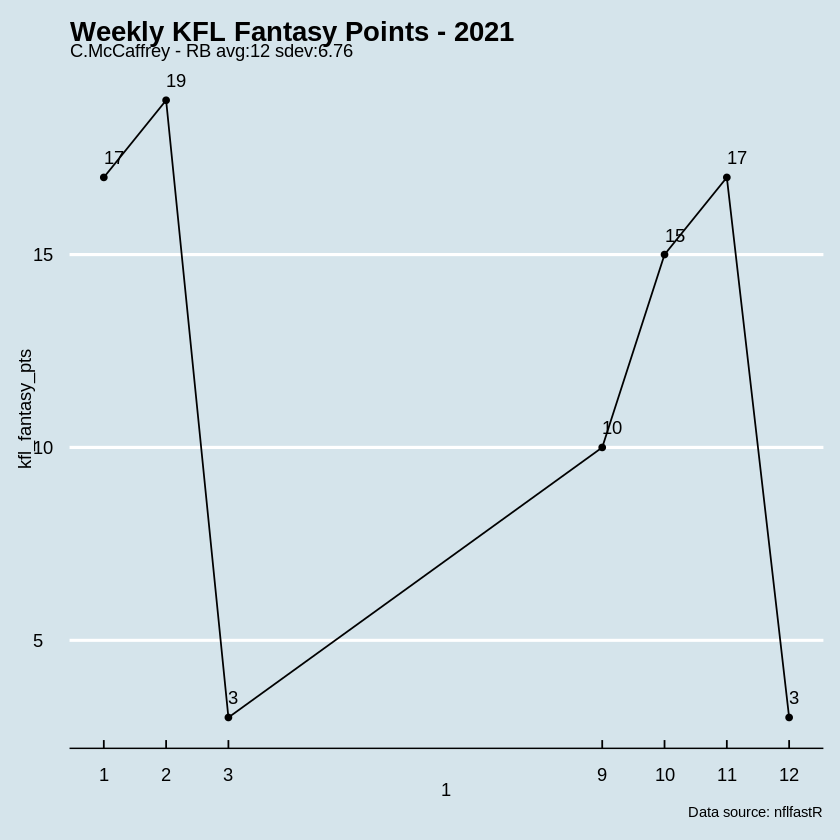

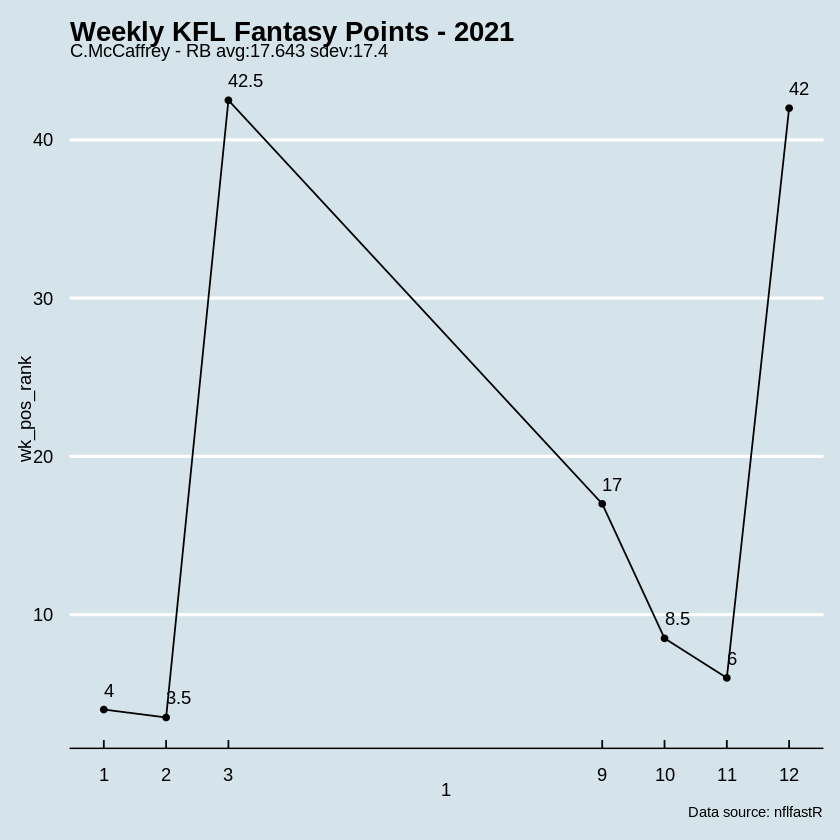

In [31]:
input_season = 2021
input_plyer_name = "C.McCaffrey"
input_pos = "RB"

plyer_info<-NFL_weekly_player_stats%>%
filter(player_name == input_plyer_name & input_season == season & position == input_pos & season_type == "REG")

plyer_info%>%
ggplot(aes(x=week,y=kfl_fantasy_pts,label=kfl_fantasy_pts)) +geom_text(hjust=0,vjust=-1)+ geom_line() + geom_point() + labs(title = paste0("Weekly KFL Fantasy Points - ",input_season),
              subtitle = paste0(input_plyer_name," - ",input_pos," avg:",round(mean(plyer_info$kfl_fantasy_pts),2)," sdev:",round(sd(plyer_info$kfl_fantasy_pts),2)),
              caption = "Data source: nflfastR") + scale_x_continuous(plyer_info$week, breaks = plyer_info$week)+theme_economist()


plyer_rank<-NFL_weekly_ranks_by_position%>%
filter(player_name == input_plyer_name & input_season == season & position == input_pos & season_type == "REG")


plyer_rank%>%
ggplot(aes(x=week,y=wk_pos_rank,label=wk_pos_rank)) +geom_text(hjust=0,vjust=-1)+ geom_line() + geom_point() + labs(title = paste0("Weekly KFL Fantasy Points - ",input_season),
              subtitle = paste0(input_plyer_name," - ",input_pos," avg:",round(mean(plyer_rank$wk_pos_rank),3)," sdev:",round(sd(plyer_rank$wk_pos_rank),2)),
              caption = "Data source: nflfastR") + scale_x_continuous(plyer_rank$week, breaks = plyer_rank$week)+theme_economist()




# Create Annual Player Stats By Position

In [41]:
QB_season_stats<-NFL_weekly_player_stats%>%
select(player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,Overall,adp_pos_rank,High,Low,kfl_fantasy_pts,wk_pos_rank,completions,attempts,passing_yards,passing_tds,rushing_yards,rushing_tds,interceptions)%>%
filter(position == "QB" & season_type == "REG")%>%
group_by(player_id,player_name,recent_team,season,position,season_type)%>%
mutate(total_fantasy_pts = sum(kfl_fantasy_pts),
games = n(),
pts_per_game = round(sum(kfl_fantasy_pts)/n(),2),
min_pts = min(kfl_fantasy_pts),
max_pts = max(kfl_fantasy_pts),
sd_pts = round(sd(kfl_fantasy_pts),2),
avg_pos_rk = round(mean(wk_pos_rank),2),
sd_pos_rk = round(sd(wk_pos_rank),2),
min_pos_rk = min(wk_pos_rank),
max_pos_rk = max(wk_pos_rank),
starter_pct_pos_rk = (sum(wk_pos_rank <=12.5)/n()),
pass_yards = sum(passing_yards),
rush_yards = sum(rushing_yards),
total_tds =  sum(rushing_tds) + sum(passing_tds),
comp_pct = round(sum(completions)/sum(attempts),2),
att_per_game = sum(attempts)/n(),
ints = sum(interceptions)
)%>%
arrange(desc(season),desc(total_fantasy_pts))%>%
select(-kfl_fantasy_pts,-completions,-attempts,-passing_yards,-passing_tds,-rushing_yards,-rushing_tds,-interceptions,-wk_pos_rank)%>%distinct()

QB_season_stats<-QB_season_stats%>%group_by(season,position)%>%
mutate(yr_pos_rank = rank(-total_fantasy_pts))

QB_season_stats%>%head(12)



player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,Overall,adp_pos_rank,⋯,min_pos_rk,max_pos_rk,starter_pct_pos_rk,pass_yards,rush_yards,total_tds,comp_pct,att_per_game,ints,yr_pos_rank
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
00-0019596,T.Brady,TB,2021,QB,REG,QB_12,8.03,72.7,12.0,⋯,1.0,31.0,0.6470588,5316,81,45,0.67,42.29412,12,1
00-0036355,J.Herbert,LAC,2021,QB,REG,QB_10,7.01,61.2,10.0,⋯,1.5,25.5,0.6470588,5014,302,41,0.66,39.52941,15,2
00-0033873,P.Mahomes,KC,2021,QB,REG,QB_1,2.05,14.6,1.0,⋯,1.0,24.0,0.6470588,4839,381,39,0.66,38.70588,13,3
00-0034857,J.Allen,BUF,2021,QB,REG,QB_3,3.07,26.6,3.0,⋯,1.0,24.0,0.6250000,4049,754,37,0.63,37.68750,15,4
00-0026498,M.Stafford,LA,2021,QB,REG,QB_13,9.02,82.0,13.0,⋯,2.0,30.5,0.6470588,4886,43,41,0.67,35.35294,17,5
00-0033077,D.Prescott,DAL,2021,QB,REG,QB_9,6.04,54.0,9.0,⋯,1.0,29.5,0.6875000,4449,146,38,0.69,37.25000,10,6
00-0036442,J.Burrow,CIN,2021,QB,REG,QB_16,11.06,105.7,16.0,⋯,1.0,26.0,0.5000000,4611,118,36,0.70,32.50000,14,7
00-0029604,K.Cousins,MIN,2021,QB,REG,QB_25.5,16.04,154.0,25.5,⋯,2.0,28.0,0.6250000,4221,115,34,0.66,35.06250,7,8
00-0035228,K.Murray,ARI,2021,QB,REG,QB_5,4.06,35.9,5.0,⋯,1.0,29.5,0.5714286,3787,423,29,0.69,34.35714,10,9


In [42]:
RB_season_stats<-NFL_weekly_player_stats%>%
select(player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,High,Low,kfl_fantasy_pts,wk_pos_rank,targets,attempts,receiving_yards,receiving_tds,rushing_yards,rushing_tds,targets,carries)%>%
filter(position == "RB" & season_type == "REG")%>%
group_by(player_id,player_name,recent_team,season,position,season_type)%>%
mutate(total_fantasy_pts = sum(kfl_fantasy_pts),
games = n(),
pts_per_game = round(sum(kfl_fantasy_pts)/n(),2),
min_pts = min(kfl_fantasy_pts),
max_pts = max(kfl_fantasy_pts),
sd_pts = round(sd(kfl_fantasy_pts),2),
avg_pos_rk = round(mean(wk_pos_rank),2),
sd_pos_rk = round(sd(wk_pos_rank),2),
min_pos_rk = min(wk_pos_rank),
max_pos_rk = max(wk_pos_rank),
starter_pct_pos_rk = (sum(wk_pos_rank <=25)/n()),
trgt_per_game = sum(targets)/n(),
rush_yards = sum(rushing_yards),
rec_yd = sum(receiving_yards),
carry= sum(carries),
total_tds =  sum(rushing_tds) + sum(receiving_tds)
)%>%select(-kfl_fantasy_pts,-wk_pos_rank,-attempts,-receiving_yards,-receiving_tds,-rushing_yards,-rushing_tds,-targets,-carries)%>%distinct()%>%
arrange(desc(season),desc(total_fantasy_pts))

RB_season_stats<-RB_season_stats%>%group_by(season,position)%>%
mutate(yr_pos_rank = rank(-total_fantasy_pts))



RB_season_stats%>%head(48)

player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,⋯,sd_pos_rk,min_pos_rk,max_pos_rk,starter_pct_pos_rk,trgt_per_game,rush_yards,rec_yd,carry,total_tds,yr_pos_rank
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
00-0036223,J.Taylor,IND,2021,RB,REG,RB_8,1.09,8.0,8.9,⋯,11.23,1.0,36.0,0.8823529,3.0000000,1811,360,332,20,1.0
00-0033699,A.Ekeler,LAC,2021,RB,REG,RB_11,2.03,11.0,13.3,⋯,9.94,2.0,37.5,0.8750000,5.8750000,911,647,206,20,2.0
00-0033897,J.Mixon,CIN,2021,RB,REG,RB_13,2.07,13.0,17.3,⋯,12.00,1.0,34.0,0.6875000,3.0000000,1205,314,292,16,3.0
00-0036893,N.Harris,PIT,2021,RB,REG,RB_10,2.02,10.0,12.5,⋯,16.75,2.0,59.0,0.7647059,5.5294118,1200,467,307,10,4.0
00-0033553,J.Conner,ARI,2021,RB,REG,RB_36,9.06,36.0,86.0,⋯,15.29,1.0,53.5,0.6666667,2.6000000,752,375,202,18,5.0
00-0033045,E.Elliott,DAL,2021,RB,REG,RB_5,1.05,5.0,5.4,⋯,14.83,1.0,51.5,0.6470588,3.8235294,1002,287,237,12,6.0
00-0034791,N.Chubb,CLE,2021,RB,REG,RB_6,1.06,6.0,6.2,⋯,15.74,2.0,42.0,0.5000000,1.7857143,1259,174,228,9,7.0
00-0035657,D.Harris,NE,2021,RB,REG,RB_27,6.05,27.0,54.6,⋯,18.25,1.0,69.0,0.7333333,1.4000000,929,132,202,15,8.0
00-0033906,A.Kamara,NO,2021,RB,REG,RB_4,1.04,4.0,4.1,⋯,17.54,1.0,53.5,0.7692308,5.1538462,898,439,240,9,9.0


In [43]:
WR_season_stats<-NFL_weekly_player_stats%>%
select(player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,High,Low,kfl_fantasy_pts,wk_pos_rank,targets,target_share,receptions,receiving_yards,receiving_tds,rushing_yards,rushing_tds)%>%
filter(position == "WR" & season_type == "REG")%>%
group_by(player_id,player_name,recent_team,season,position,season_type)%>%
mutate(total_fantasy_pts = sum(kfl_fantasy_pts),
games = n(),
pts_per_game = round(sum(kfl_fantasy_pts)/n(),2),
min_pts = min(kfl_fantasy_pts),
max_pts = max(kfl_fantasy_pts),
sd_pts = round(sd(kfl_fantasy_pts),2),
rec_yards = sum(receiving_yards),
rush_yards = sum(rushing_yards),
total_tds =  sum(rushing_tds) + sum(receiving_tds),
avg_pos_rk = round(mean(wk_pos_rank),2),
sd_pos_rk = round(sd(wk_pos_rank),2),
min_pos_rk = min(wk_pos_rank),
max_pos_rk = max(wk_pos_rank),
starter_pct_pos_rk = (sum(wk_pos_rank <=25)/n()),
rec = sum(receptions),
tot_tgt = sum(targets),
avg_target_share = mean(target_share)
)%>%select(-kfl_fantasy_pts,-wk_pos_rank,-rushing_yards,-rushing_tds,-receiving_yards,-receiving_tds,-receptions,-targets,-target_share)%>%distinct()%>%
arrange(desc(season),desc(total_fantasy_pts))

WR_season_stats<-WR_season_stats%>%group_by(season,position)%>%
mutate(yr_pos_rank = rank(-total_fantasy_pts))

WR_season_stats%>%head(36)

player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,⋯,total_tds,avg_pos_rk,sd_pos_rk,min_pos_rk,max_pos_rk,starter_pct_pos_rk,rec,tot_tgt,avg_target_share,yr_pos_rank
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
00-0033908,C.Kupp,LA,2021,WR,REG,WR_18,6.02,18,52.2,⋯,16,11.26,11.79,1.0,44.5,0.9411765,145,191,0.3232623,1.0
00-0035719,D.Samuel,SF,2021,WR,REG,WR_34,10.02,34,92.0,⋯,14,13.69,14.12,1.0,49.5,0.8125000,77,121,0.2620535,2.0
00-0031381,D.Adams,GB,2021,WR,REG,WR_1,1.08,1,8.0,⋯,11,21.16,20.06,1.0,62.0,0.6250000,123,169,0.3168014,3.0
00-0036900,J.Chase,CIN,2021,WR,REG,WR_27,8.03,27,73.3,⋯,13,31.12,30.42,1.0,112.0,0.5882353,81,128,0.2323298,4.0
00-0036322,J.Jefferson,MIN,2021,WR,REG,WR_7,3.04,7,24.1,⋯,10,21.85,19.27,1.0,73.5,0.7058824,108,167,0.2941110,5.0
00-0031408,M.Evans,TB,2021,WR,REG,WR_11,4.07,11,37.4,⋯,14,30.56,31.35,3.0,85.5,0.6875000,74,114,0.1668908,6.0
00-0031588,S.Diggs,BUF,2021,WR,REG,WR_3,2.06,3,16.0,⋯,10,24.79,15.31,2.5,54.5,0.6470588,103,164,0.2707143,7.0
00-0033040,T.Hill,KC,2021,WR,REG,WR_2,2.02,2,11.8,⋯,9,40.06,33.99,1.0,115.0,0.4117647,111,159,0.2478888,8.0
00-0035640,D.Metcalf,SEA,2021,WR,REG,NA,NA,NA,NA,⋯,12,33.06,23.55,3.0,85.5,0.4117647,75,129,0.2773936,9.0


In [44]:
TE_season_stats<-NFL_weekly_player_stats%>%
select(player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,High,Low,kfl_fantasy_pts,wk_pos_rank,targets,target_share,receptions,receiving_yards,receiving_tds,rushing_yards,rushing_tds)%>%
filter(position == "TE" & season_type == "REG")%>%
group_by(player_id,player_name,recent_team,season,position,season_type)%>%
mutate(total_fantasy_pts = sum(kfl_fantasy_pts),
games = n(),
pts_per_game = round(sum(kfl_fantasy_pts)/n(),2),
min_pts = min(kfl_fantasy_pts),
max_pts = max(kfl_fantasy_pts),
sd_pts = round(sd(kfl_fantasy_pts),2),
avg_pos_rk = round(mean(wk_pos_rank),2),
sd_pos_rk = round(sd(wk_pos_rank),2),
min_pos_rk = min(wk_pos_rank),
max_pos_rk = max(wk_pos_rank),
starter_pct_pos_rk = (sum(wk_pos_rank <=12)/n()),
rec_yards = sum(receiving_yards),
rush_yards = sum(rushing_yards),
total_tds =  sum(rushing_tds) + sum(receiving_tds),
rec = sum(receptions),
tot_tgt = sum(targets),
avg_target_share = mean(target_share)
)%>%select(-kfl_fantasy_pts,-wk_pos_rank,-rushing_yards,-rushing_tds,-receiving_yards,-receiving_tds,-receptions,-targets,-target_share)%>%distinct()%>%
arrange(desc(season),desc(total_fantasy_pts))

TE_season_stats<-TE_season_stats%>%group_by(season,position)%>%
mutate(yr_pos_rank = rank(-total_fantasy_pts))


TE_season_stats%>%head(12)

player_id,player_name,recent_team,season,position,season_type,pos_rank,ADP,adp_pos_rank,Overall,⋯,min_pos_rk,max_pos_rk,starter_pct_pos_rk,rec_yards,rush_yards,total_tds,rec,tot_tgt,avg_target_share,yr_pos_rank
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
00-0034753,M.Andrews,BAL,2021,TE,REG,TE_5,5.08,5,48.4,⋯,1,31.5,0.7058824,1361,0,9,107,153,0.2577835,1.0
00-0030506,T.Kelce,KC,2021,TE,REG,TE_1,2.01,1,10.5,⋯,1,48.5,0.7500000,1125,3,10,92,134,0.2213205,2.0
00-0033288,G.Kittle,SF,2021,TE,REG,TE_3,4.01,3,30.9,⋯,1,38.0,0.5714286,910,20,6,71,94,0.2243768,3.5
00-0034383,D.Schultz,DAL,2021,TE,REG,NA,NA,NA,NA,⋯,1,45.5,0.4117647,808,0,8,78,104,0.1707253,3.5
00-0027656,R.Gronkowski,TB,2021,TE,REG,TE_8,9.02,8,82.2,⋯,1,48.5,0.6666667,802,0,6,55,89,0.1704982,5.0
00-0033090,H.Henry,NE,2021,TE,REG,TE_13,13.05,13,124.9,⋯,1,49.0,0.5000000,603,0,9,50,75,0.1470544,6.5
00-0035689,D.Knox,BUF,2021,TE,REG,NA,NA,NA,NA,⋯,1,46.5,0.5333333,587,0,9,49,71,0.1335960,6.5
00-0034351,D.Goedert,PHI,2021,TE,REG,TE_9,9.10,9,89.8,⋯,2,51.5,0.4666667,830,0,4,56,76,0.2069620,8.5
00-0036970,K.Pitts,ATL,2021,TE,REG,TE_4,5.02,4,41.6,⋯,2,47.5,0.4705882,1026,0,1,68,110,0.2034160,8.5


# Player Evaluation Analysis

In this section we will put together an analysis that allows you to deep dive into a player's last season and total history

# TE Analysis 

This section allows you to evaluate Tight ends through a variety of graphs and tables. All you need to do is update the player name and execute the code in this section


Adding missing grouping variables: `position`


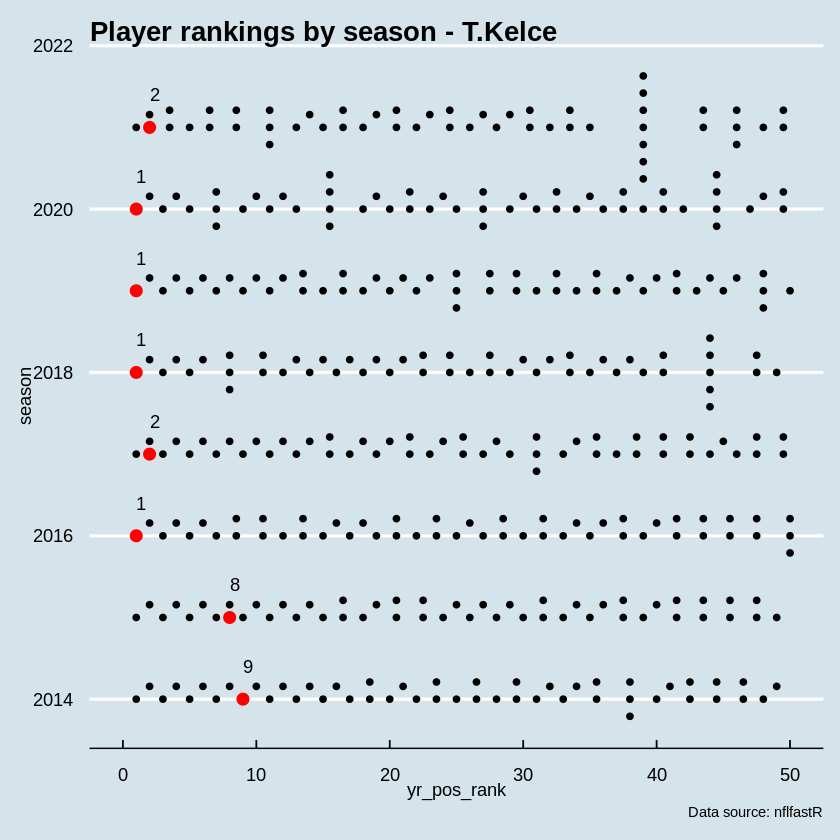

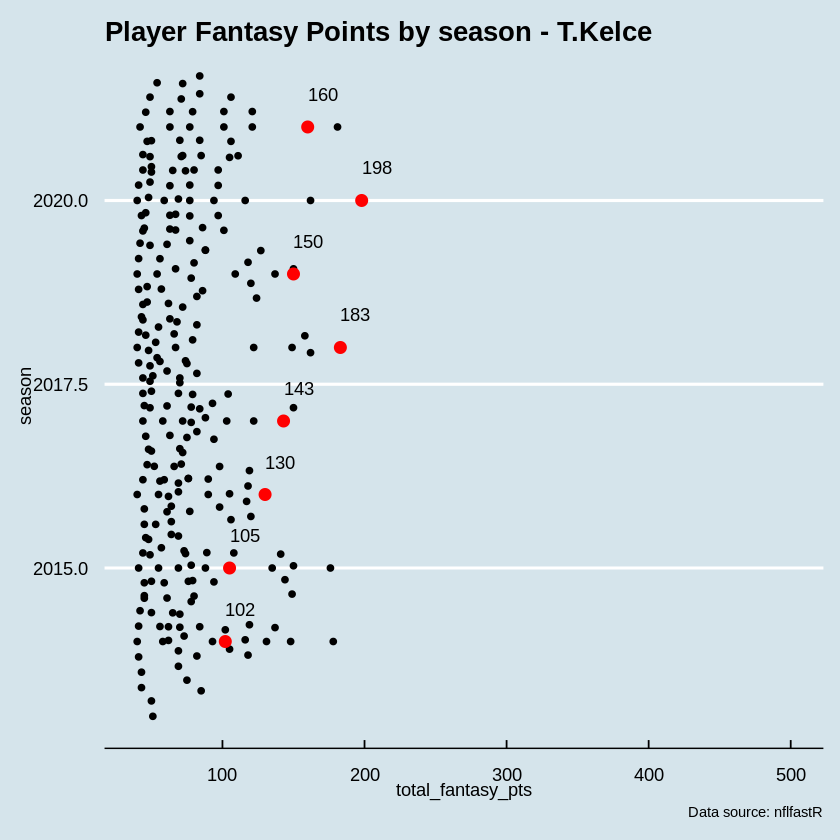

In [46]:
p_name<-"T.Kelce"

options(warn = -1)
TE_plyer_stats<-TE_season_stats%>%filter(player_name==p_name)%>%select(-position,-season_type,-avg_target_share,-rush_yards)
season_list<-as.integer(unique(TE_plyer_stats$season))
position_list<-unique(TE_plyer_stats$position)

TE_bee_graph<-TE_season_stats%>%filter(season %in% season_list & position %in% position_list)

ggplot(TE_bee_graph,aes(x=season,y=yr_pos_rank)) + coord_flip() + ylim(0,50) + geom_beeswarm(cex = 3) +geom_point(data=TE_plyer_stats, 
             aes(x=season,y=yr_pos_rank), 
             color='red',
             size=3) + geom_text(data=TE_plyer_stats,aes(x=season,y=yr_pos_rank,label=yr_pos_rank),hjust=0,vjust=-2) + labs(title = paste0("Player rankings by season - ",TE_plyer_stats$player_name),
              caption = "Data source: nflfastR") + theme_economist()


 ggplot(TE_bee_graph,aes(x=season,y=total_fantasy_pts)) + coord_flip() + ylim(40,500) + geom_beeswarm(cex = 3) +geom_point(data=TE_plyer_stats, 
aes(x=season,y=total_fantasy_pts), 
color='red',
size=3) + geom_text(data=TE_plyer_stats,aes(x=season,y=total_fantasy_pts,label=total_fantasy_pts),hjust=0,vjust=-2) + labs(title = paste0("Player Fantasy Points by season - ",TE_plyer_stats$player_name),
caption = "Data source: nflfastR") + theme_economist()



In [47]:
NFL_rosters%>%filter(gsis_id == TE_plyer_stats$player_id & season == 2021)%>%select(team,depth_chart_position,jersey_number,full_name,approx_age)

TE_plyer_stats%>%select(-position,-player_id,-player_name)

NFL_weekly_player_stats%>%filter(season==2021 & player_name == p_name)%>%
select(
week,
position,
kfl_fantasy_pts,
wk_pos_rank,
target_share,
receiving_yards,
receiving_tds,
receptions)



team,depth_chart_position,jersey_number,full_name,approx_age
<chr>,<chr>,<int>,<chr>,<dbl>
KC,LTE,87,Travis Kelce,32


Adding missing grouping variables: `position`


position,recent_team,season,pos_rank,ADP,adp_pos_rank,Overall,High,Low,total_fantasy_pts,⋯,avg_pos_rk,sd_pos_rk,min_pos_rk,max_pos_rk,starter_pct_pos_rk,rec_yards,total_tds,rec,tot_tgt,yr_pos_rank
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
TE,KC,2021,TE_1,2.01,1,10.5,4,18,160,⋯,11.41,13.38,1.0,48.5,0.7500000,1125,10,92,134,2
TE,KC,2020,TE_1,3.01,1,21.0,11,32,198,⋯,5.37,6.24,1.0,25.5,0.9333333,1416,11,105,145,1
TE,KC,2019,TE_1,2.08,1,17.8,8,24,150,⋯,8.81,6.02,1.0,24.5,0.7500000,1229,6,97,136,1
TE,KC,2018,TE_2,4.04,2,33.6,21,47,183,⋯,9.38,13.54,1.0,56.0,0.7500000,1336,10,103,150,1
TE,KC,2017,TE_2,4.10,2,39.9,26,52,143,⋯,11.90,12.25,1.0,47.0,0.6000000,1038,8,83,122,2
TE,KC,2016,TE_4,7.01,4,61.4,48,73,130,⋯,14.38,12.45,1.0,47.5,0.5625000,1125,4,85,117,1
TE,KC,2015,TE_4,6.05,4,55.4,38,72,105,⋯,17.25,10.89,3.5,38.5,0.3750000,875,5,72,103,8
TE,KC,2014,NA,NA,NA,NA,NA,NA,102,⋯,14.66,9.46,2.0,32.5,0.5625000,862,5,67,87,9


week,position,kfl_fantasy_pts,wk_pos_rank,target_share,receiving_yards,receiving_tds,receptions
<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,TE,19,2.0,0.2058824,76,2,6
2,TE,16,1.0,0.2666667,109,1,7
3,TE,10,5.5,0.2750000,104,0,7
4,TE,2,28.0,0.2000000,23,0,4
5,TE,11,6.0,0.2000000,57,1,6
6,TE,9,6.0,0.2391304,99,0,8
7,TE,6,11.0,0.2500000,65,0,7
8,TE,0,48.5,0.1395349,27,0,4
9,TE,12,3.0,0.2222222,68,1,5


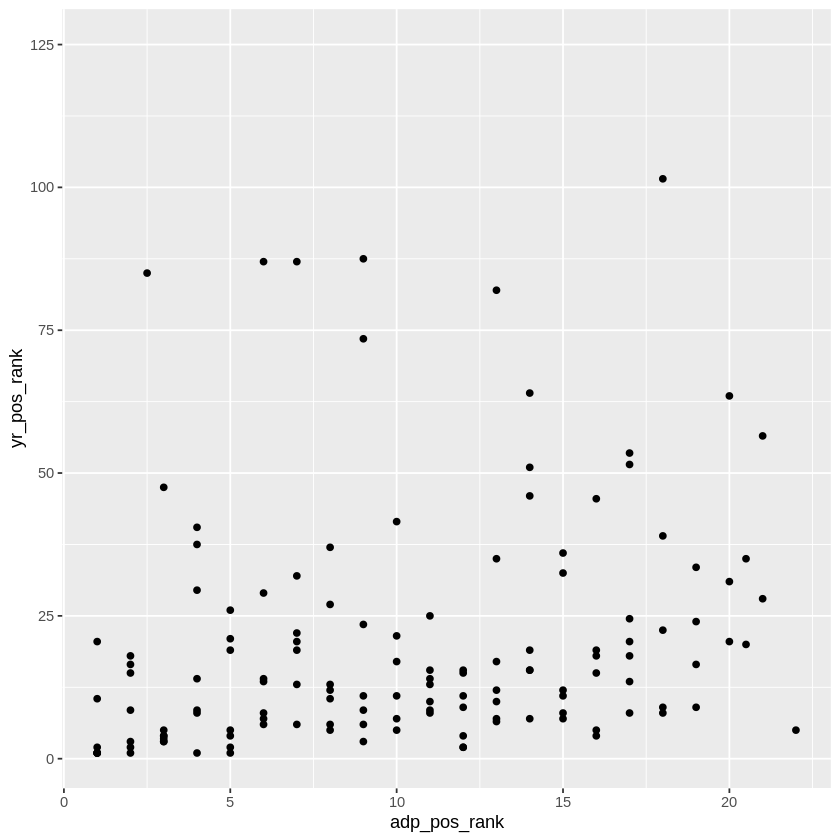

In [51]:

ggplot(TE_season_stats,aes(x=adp_pos_rank,y=yr_pos_rank))+geom_point()


# RB Analysis

In [ ]:
p_name<-"A.Jones"

options(warn = -1)
RB_plyer_stats<-RB_season_stats%>%filter(player_name==p_name)%>%select(-position,-season_type,-rush_yards)
season_list<-as.integer(unique(RB_plyer_stats$season))
position_list<-unique(RB_plyer_stats$position)

RB_bee_graph<-RB_season_stats%>%filter(season %in% season_list & position %in% position_list)

ggplot(RB_bee_graph,aes(x=season,y=yr_pos_rank)) + coord_flip() + ylim(0,50) + geom_beeswarm(cex = 3) +geom_point(data=RB_plyer_stats, 
             aes(x=season,y=yr_pos_rank), 
             color='red',
             size=3) + geom_text(data=RB_plyer_stats,aes(x=season,y=yr_pos_rank,label=yr_pos_rank),hjust=0,vjust=-2) + labs(title = paste0("Player rankings by season - ",RB_plyer_stats$player_name),
              caption = "Data source: nflfastR") + theme_economist()


 ggplot(RB_bee_graph,aes(x=season,y=total_fantasy_pts)) + coord_flip() + ylim(40,500) + geom_beeswarm(cex = 3) +geom_point(data=RB_plyer_stats, 
aes(x=season,y=total_fantasy_pts), 
color='red',
size=3) + geom_text(data=RB_plyer_stats,aes(x=season,y=total_fantasy_pts,label=total_fantasy_pts),hjust=0,vjust=-2) + labs(title = paste0("Player Fantasy Points by season - ",RB_plyer_stats$player_name),
caption = "Data source: nflfastR") + theme_economist()


NFL_rosters%>%filter(gsis_id == RB_plyer_stats$player_id & season == 2021)%>%select(team,depth_chart_position,jersey_number,full_name,approx_age)

RB_plyer_stats%>%select(-position,-player_id,-player_name)

NFL_weekly_player_stats%>%filter(season==2021 & player_name == p_name)%>%
select(
week,
position,
kfl_fantasy_pts,
wk_pos_rank,
carries,
rushing_yards,
rushing_tds,
target_share,
receiving_yards,
receiving_tds,
receptions,)



# WR Analysis

# QB Analysis

# ADP analysis